In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import nltk
import nltk.corpus
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from sklearn.datasets import fetch_20newsgroups
ds = fetch_20newsgroups()

In [3]:
ds.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
print(ds['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [57]:
ds_train = fetch_20newsgroups(subset='train', shuffle=True)

In [58]:
print("\n".join(ds_train.data[0].split("\n")[:3]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()#Convert a collection of text documents to a matrix of token counts
x_train_counts = count_vect.fit_transform(ds_train.data)#learning the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, n_features].
x_train_counts.shape

(11314, 130107)

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer#ensure longer documents do not get more weight and that common words (the, a  etc) have a reduced weightage
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(11314, 130107)

In [61]:
from sklearn.neighbors import KNeighborsClassifier 
KNN=KNeighborsClassifier(n_neighbors=9)

In [62]:
classifier = KNN.fit(x_train_tfidf, ds_train.target)
new=['Where is my car']
x_new_counts = count_vect.transform(new)
x_new_tfidf = tfidf_transformer.transform(x_new_counts)

In [63]:
predicted = classifier.predict(x_new_tfidf)

for doc, category in zip(new, predicted):
    print('%r => %s' % (doc, ds_train.target_names[category]))

'Where is my car' => rec.autos


In [64]:
from sklearn.pipeline import Pipeline
text_classifier = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', KNN),
])

In [65]:
text_classifier.fit(ds_train.data, ds_train.target)

ds_test = fetch_20newsgroups(subset='test',shuffle=True)# Test data 
doc_test = ds_test.data


In [66]:
predicted = text_classifier.predict(doc_test)# Predicting our test data
print('We got an accuracy of',np.mean(predicted == ds_test.target)*100, '% over the test data.')

We got an accuracy of 65.36112586298461 % over the test data.


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
text_classifier1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', KNN),
])

In [68]:
text_classifier1.fit(ds_train.data, ds_train.target)

ds_test = fetch_20newsgroups(subset='test', shuffle=True)# Test data 
doc_test = ds_test.data
predicted = text_classifier1.predict(doc_test)# Predicting our test data
print('We got an accuracy of',np.mean(predicted == ds_test.target)*100, '% over the test data.')

We got an accuracy of 67.85714285714286 % over the test data.


As can be seen above, removing the stopwords slightly increased the accuracy of the test.

In [69]:
from sklearn import metrics
print(metrics.classification_report(ds_test.target, predicted, target_names=ds_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.60      0.76      0.67       319
           comp.graphics       0.52      0.63      0.57       389
 comp.os.ms-windows.misc       0.59      0.63      0.61       394
comp.sys.ibm.pc.hardware       0.51      0.59      0.55       392
   comp.sys.mac.hardware       0.56      0.55      0.55       385
          comp.windows.x       0.68      0.60      0.63       395
            misc.forsale       0.51      0.43      0.46       390
               rec.autos       0.71      0.69      0.70       396
         rec.motorcycles       0.80      0.85      0.82       398
      rec.sport.baseball       0.70      0.74      0.72       397
        rec.sport.hockey       0.80      0.87      0.84       399
               sci.crypt       0.76      0.84      0.80       396
         sci.electronics       0.62      0.50      0.55       393
                 sci.med       0.83      0.58      0.68       396
         

As can be seen above, the accuracy is not the best. It would be good to try an alternative classification model that is better suited to this dataset to find a better fit and increase accuracy.
Now Multinomial Naive Bayes classifier shall be used to compare.

In [71]:
from sklearn.naive_bayes import MultinomialNB
text_classifier2 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB()),
])

In [72]:
text_classifier2.fit(ds_train.data, ds_train.target)

ds_test = fetch_20newsgroups(subset='test', shuffle=True)# Test data 
doc_test = ds_test.data
predicted = text_classifier2.predict(doc_test)# Predicting our test data
print('We got an accuracy of',np.mean(predicted == ds_test.target)*100, '% over the test data.')

We got an accuracy of 80.9612320764737 % over the test data.


In [73]:
print(metrics.classification_report(ds_test.target, predicted, target_names=ds_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.66      0.73       319
           comp.graphics       0.78      0.71      0.74       389
 comp.os.ms-windows.misc       0.79      0.70      0.74       394
comp.sys.ibm.pc.hardware       0.67      0.80      0.73       392
   comp.sys.mac.hardware       0.87      0.81      0.84       385
          comp.windows.x       0.87      0.79      0.82       395
            misc.forsale       0.88      0.78      0.82       390
               rec.autos       0.87      0.92      0.90       396
         rec.motorcycles       0.93      0.95      0.94       398
      rec.sport.baseball       0.92      0.91      0.92       397
        rec.sport.hockey       0.88      0.98      0.93       399
               sci.crypt       0.72      0.97      0.83       396
         sci.electronics       0.83      0.64      0.72       393
                 sci.med       0.92      0.78      0.84       396
         

As can be seen above, the use of an alternative model has greatly increased the accuracy. This shows how important it is to use the correct model for the data you have.

In [83]:
from sklearn.metrics import confusion_matrix
conf_met=confusion_matrix(ds_test.target, predicted)
metrics.confusion_matrix(ds_test.target, predicted)

array([[211,   0,   0,   1,   0,   1,   0,   0,   2,   1,   1,   3,   0,
          7,   4,  72,   5,   8,   1,   2],
       [  1, 277,  16,  13,   8,  20,   3,   4,   1,   6,   2,  21,   5,
          0,   8,   1,   2,   1,   0,   0],
       [  1,  18, 275,  43,   4,  13,   1,   1,   4,   4,   2,  13,   1,
          0,   5,   8,   1,   0,   0,   0],
       [  0,   5,  16, 314,  16,   2,  10,   4,   1,   0,   2,   3,  14,
          0,   5,   0,   0,   0,   0,   0],
       [  0,   3,  10,  23, 311,   2,   8,   3,   2,   3,   1,   7,   7,
          0,   2,   1,   2,   0,   0,   0],
       [  1,  29,  18,  11,   1, 311,   1,   0,   1,   1,   0,  11,   0,
          1,   4,   3,   2,   0,   0,   0],
       [  0,   2,   3,  28,  10,   1, 304,  13,   2,   2,   6,   1,   8,
          6,   1,   2,   1,   0,   0,   0],
       [  0,   1,   0,   3,   0,   0,   5, 365,   3,   2,   3,   2,   3,
          1,   3,   0,   4,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   4,  10, 380,   0,   0,  

The confusion matrix in the form above is not as easy to read and therefore a heatmap should be created instaed.

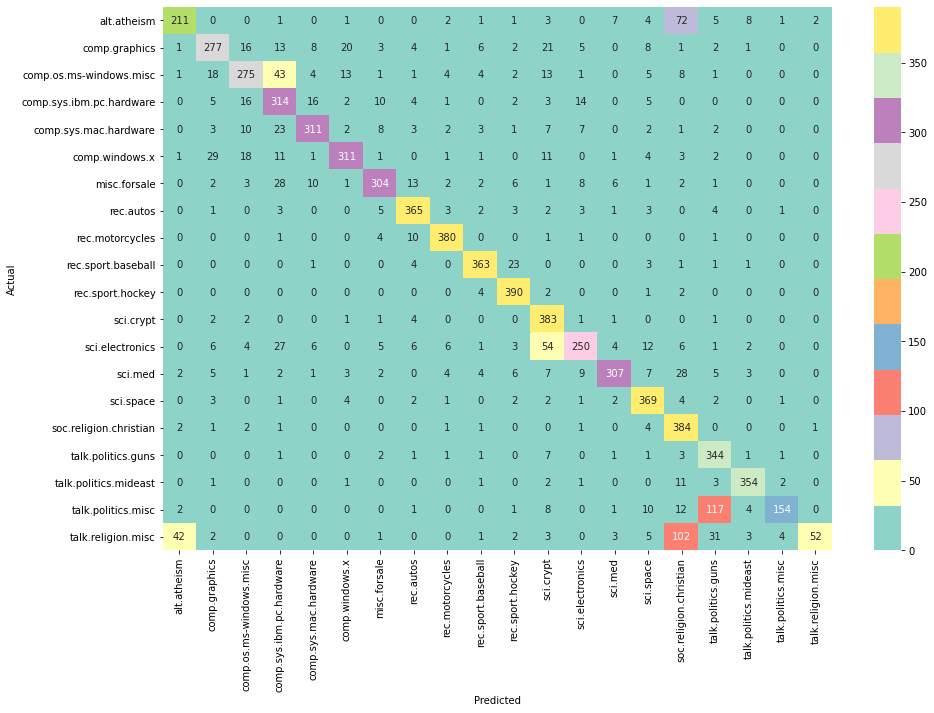

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
labels=ds['target_names']
sns.heatmap(conf_met, annot=True, cmap = "Set3", fmt ="d", xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The confusion matrix above can be used to determine where the misclassification/ mixing is occuring the most.

Further itertions cn be performed using different values for the parameters but also by trying other classification models.